In [1]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

In [47]:
day1 = "/Users/sarthak/Desktop/imc/round_4/round-4-island-data-bottle/prices_round_4_day_1.csv"
day2 = "/Users/sarthak/Desktop/imc/round_4/round-4-island-data-bottle/prices_round_4_day_2.csv"
day3 = "/Users/sarthak/Desktop/imc/round_4/round-4-island-data-bottle/prices_round_4_day_3.csv"


In [48]:
day_1 = pd.read_csv(day1,delimiter=';')
day_2 = pd.read_csv(day2,delimiter=';')
day_3 = pd.read_csv(day3,delimiter=';')

In [49]:
final = pd.concat([day_1,day_2,day_3],axis=0)

In [50]:
final.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1,1,0,PICNIC_BASKET1,58705.0,12.0,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252.0,12.0,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,VOLCANIC_ROCK_VOUCHER_9500,1015.0,12.0,NaN,NaN,NaN,NaN,1017,12,NaN,NaN,NaN,NaN,1016.0,0.0
4,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0


In [51]:
croissant = final.loc[final['product'] == 'CROISSANTS']
djembes = final.loc[final['product'] == 'DJEMBES']
jams = final.loc[final['product'] == 'JAMS']
b1 = final.loc[final['product'] == 'PICNIC_BASKET1']
b2 = final.loc[final['product'] == 'PICNIC_BASKET2']

In [7]:
b1_3 = day_3.loc[day_3['product'] == 'PICNIC_BASKET1']
b2_3 = day_3.loc[day_3['product'] == 'PICNIC_BASKET2']
croissant_3 = day_3.loc[day_3['product'] == 'CROISSANTS']
djembes_3 = day_3.loc[day_3['product'] == 'DJEMBES']
jams_3 = day_3.loc[day_3['product'] == 'JAMS']


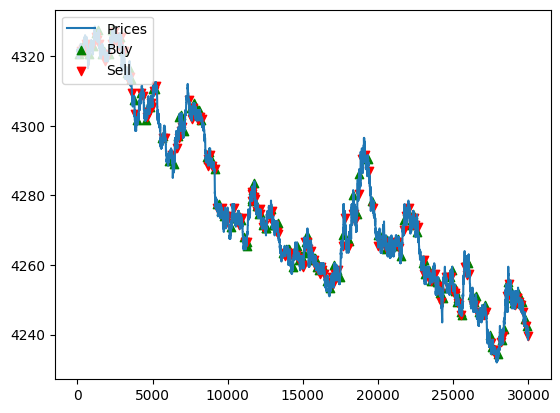

In [34]:
prices = pd.Series(croissant.mid_price.values)

short_ma = pd.Series(croissant.mid_price.values).rolling(51).mean()
long_ma = pd.Series(croissant.mid_price.values).rolling(100).mean()

signals = pd.Series(index=prices.index, data=0)

# add signals for crossovers
signals[(short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))] = 1  # buy signal
signals[(short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))] = -1  # sell signal

plt.plot(prices, label='Prices')
# plt.plot(short_ma, label='Short MA', alpha=0.5)
# plt.plot(long_ma, label='Long MA', alpha=0.5)

# plot signals
plt.scatter(signals.index[signals == 1], prices[signals == 1], label='Buy', marker='^', color='g')
plt.scatter(signals.index[signals == -1], prices[signals == -1], label='Sell', marker='v', color='r')

plt.legend(loc='upper left')
plt.show()

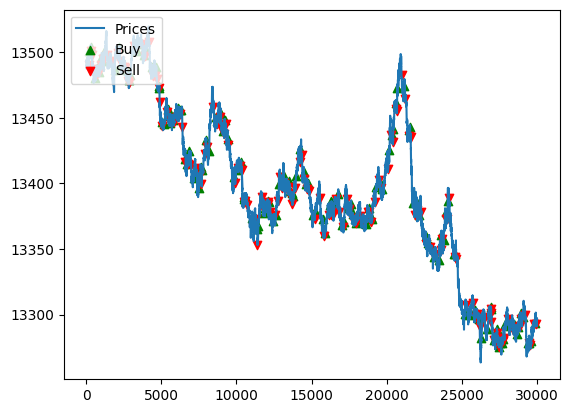

In [36]:
prices = pd.Series(djembes.mid_price.values)

short_ma = pd.Series(djembes.mid_price.values).rolling(51).mean()
short_std = pd.Series(djembes.mid_price.values).rolling(51).std()
long_ma = pd.Series(djembes.mid_price.values).rolling(100).mean()

signals = pd.Series(index=prices.index, data=0)

# add signals for crossovers
signals[(short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))] = 1  # buy signal
signals[(short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))] = -1  # sell signal

plt.plot(prices, label='Prices')
# plt.plot(short_ma, label='Short MA', alpha=0.5)
# plt.plot(long_ma, label='Long MA', alpha=0.5)

# plot signals
plt.scatter(signals.index[signals == 1], prices[signals == 1], label='Buy', marker='^', color='g')
plt.scatter(signals.index[signals == -1], prices[signals == -1], label='Sell', marker='v', color='r')

plt.legend(loc='upper left')
plt.show()

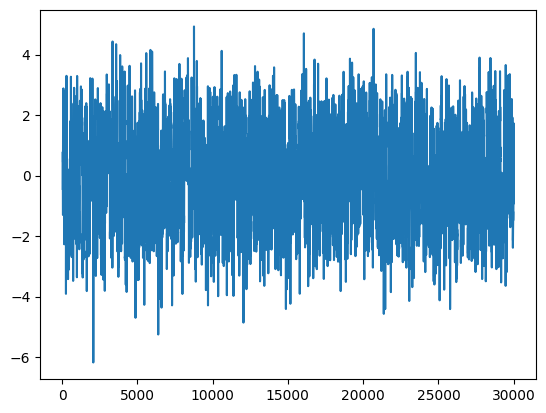

In [37]:
plt.plot((djembes.mid_price.values - short_ma)/short_std)

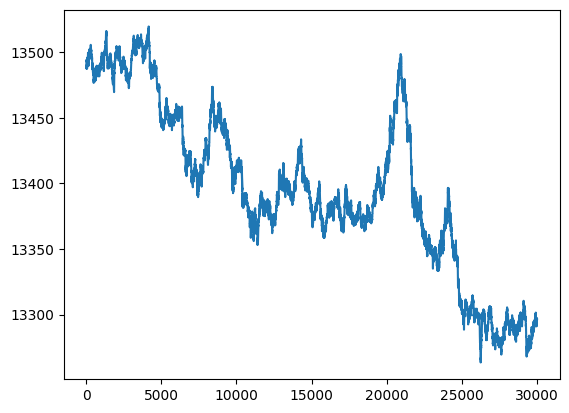

In [39]:
plt.plot(djembes.mid_price.values)

In [22]:
spread_cj = (jams.mid_price.values-croissant.mid_price.values)

In [23]:
np.mean(spread_cj)

np.float64(2266.145266666667)

In [47]:
pd.Series(djembes.mid_price.values).rolling(50).mean().std()/pd.Series(djembes.mid_price.values).rolling(50).mean().mean()

np.float64(0.004826771700592401)

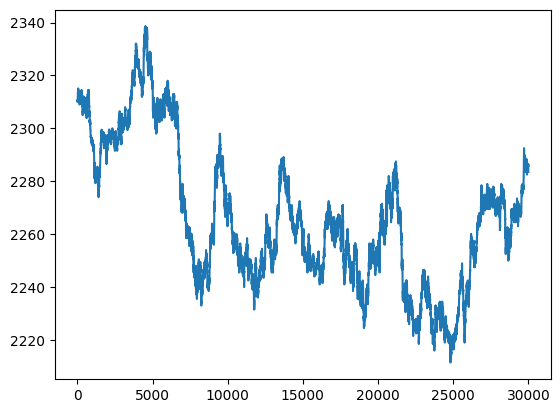

In [24]:
plt.plot(spread_cj)

In [70]:
np.mean((croissant.ask_price_1+croissant.bid_price_1)/2)

np.float64(4297.841033333333)

In [71]:
np.mean((jams.ask_price_1+jams.bid_price_1)/2)

np.float64(6593.315666666666)

In [74]:
np.std(((jams.ask_price_1+jams.bid_price_1)/2) - ((croissant.ask_price_1+croissant.bid_price_1)/2))

np.float64(73.66954088573392)

In [77]:
print(np.mean(spread_cj))
print(np.std(spread_cj))

2295.4746333333333
40.0489170456858


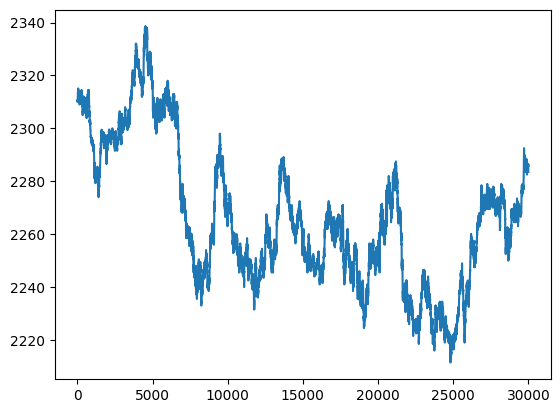

In [9]:
plt.plot(spread_cj)

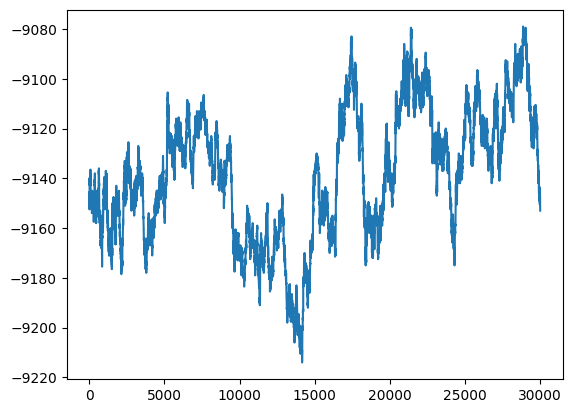

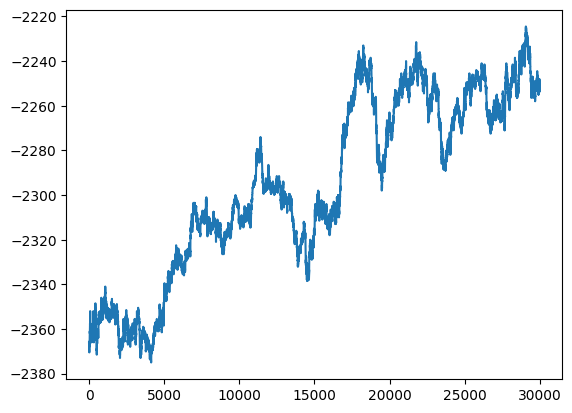

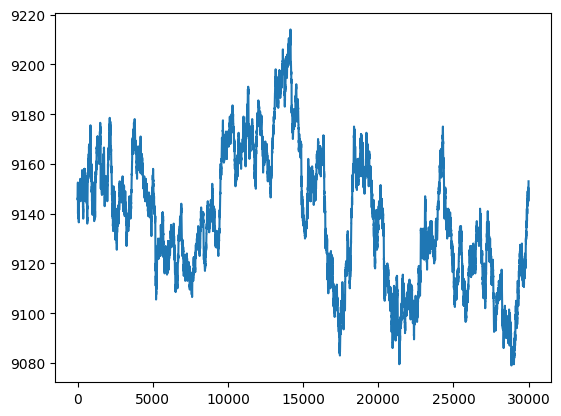

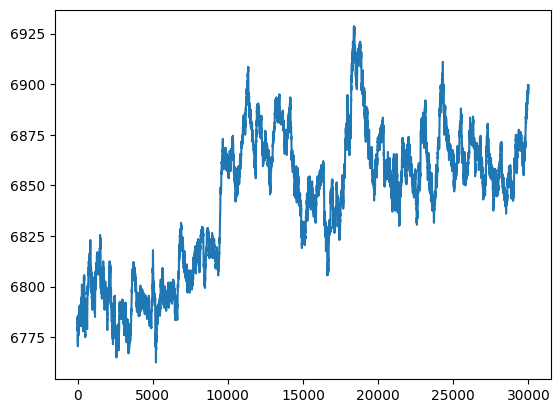

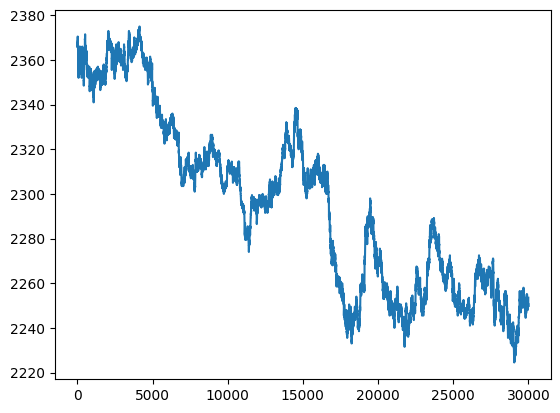

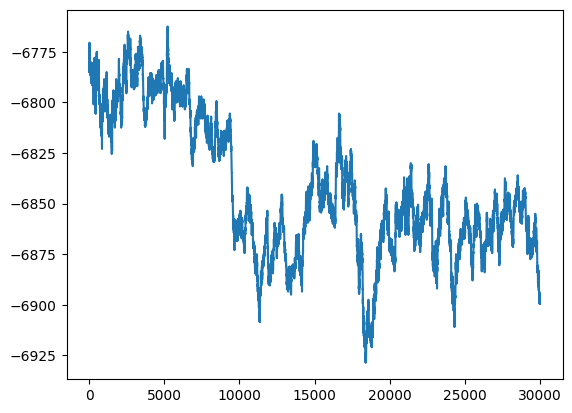

In [31]:
for pr1 in [croissant,djembes,jams]:
    for pr2 in [croissant,djembes,jams]:
        if pr1.product != pr2.product:
            # print(f"{pr1.product} vs {pr2.product}")
            plt.plot(pr1.mid_price.values-pr2.mid_price.values)
            plt.show()


In [10]:
cr1 = (croissant.mid_price.values - min(croissant.mid_price.values))/(max(croissant.mid_price.values)-min(croissant.mid_price.values))
cr2 = (djembes.mid_price.values - min(djembes.mid_price.values))/(max(djembes.mid_price.values)-min(djembes.mid_price.values))
diff = croissant.mid_price.values - djembes.mid_price.values
cr3 = (diff - min(diff))/(max(diff)-min(diff))

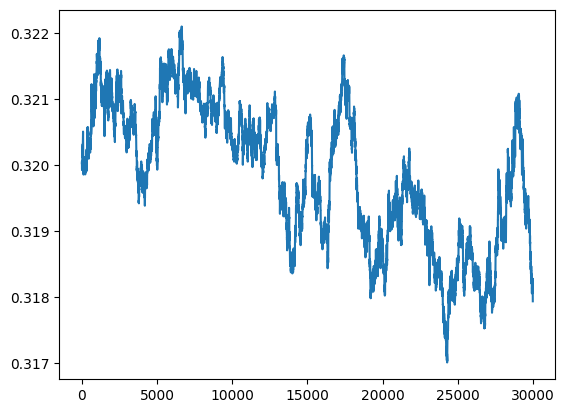

In [48]:
plt.plot(croissant.mid_price.values/djembes.mid_price.values)

[]

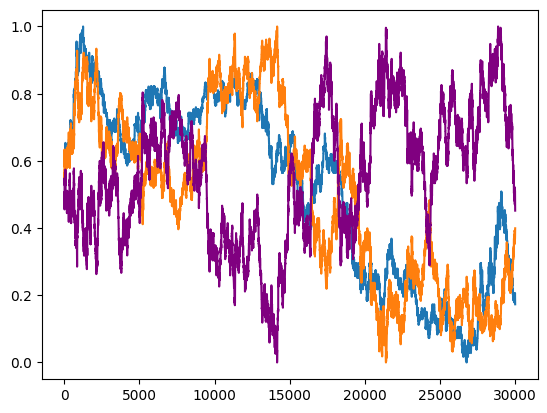

In [45]:
plt.plot(cr1)
plt.plot(cr2)
# plt.plot(cr3,color = "purple")
plt.plot()

/var/folders/8q/g9zgyk_93cx60fwx51810pjh0000gn/T/ipykernel_10847/631950.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cr1/cr2)


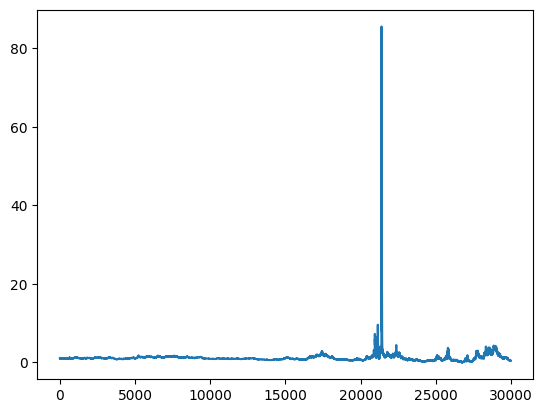

In [49]:
plt.plot(cr1/cr2)

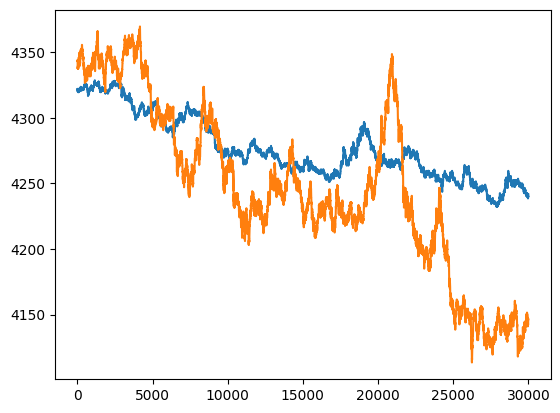

In [11]:

plt.plot(croissant.mid_price.values)
plt.plot(djembes.mid_price.values-9150)

In [11]:
b1.mid_price.values

array([59289. , 59287. , 59293.5, ..., 58715. , 58725.5, 58718.5],
      shape=(30000,))

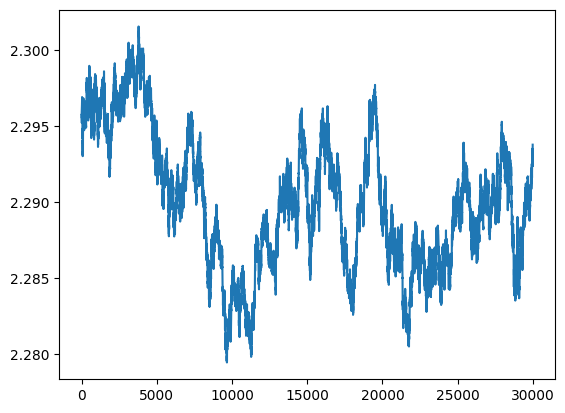

In [16]:
plt.plot(b1.mid_price.values/croissant.mid_price.values/6)

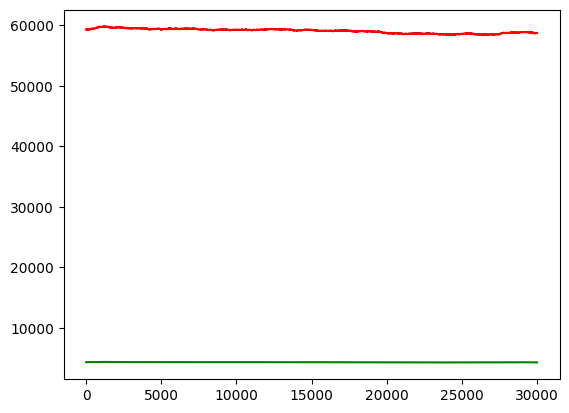

In [13]:
plt.plot(b1.mid_price.values,color="red")
plt.plot(croissant.mid_price.values,color="green")

In [44]:
# pb_1 = 6*(croissant.ask_price_1.values+croissant.bid_price_1.values)/2 + 3*(jams.ask_price_1.values+jams.bid_price_1.values)/2 + 1*(djembes.ask_price_1.values+djembes.bid_price_1.values)/2
pb_2 = 4*croissant.mid_price.values + 2*jams.mid_price.values
pb_1 = 6*croissant.mid_price.values + 3*jams.mid_price.values + djembes.mid_price.values

In [8]:
pb_1_3 = 6*croissant_3.mid_price.values + 1*djembes_3.mid_price.values + 3*jams_3.mid_price.values 
pb_2_3 = 4*croissant_3.mid_price.values + 2*jams_3.mid_price.values

In [9]:
spread_1_3 = b1_3.mid_price.values - pb_1_3
spread_2_3 = b2_3.mid_price.values - pb_2_3

In [37]:
def calculate_swmid(df):
    """Calculates Spread-Weighted Mid-Price for a DataFrame."""
    bp1 = df['bid_price_1']
    bv1 = df['bid_volume_1']
    ap1 = df['ask_price_1']
    av1 = df['ask_volume_1']

    # Calculate total volume at level 1
    total_volume = bv1 + av1

    # Calculate weighted sum part of swmid
    weighted_sum = (bp1 * av1) + (ap1 * bv1)

    # Calculate simple mid-price as fallback where total volume is zero
    simple_mid = (bp1 + ap1) / 2

    # Calculate swmid, using simple_mid where total_volume is 0 or NaN
    # Also handle cases where weighted_sum might be NaN if prices/volumes are NaN
    swmid = np.where(
        (total_volume > 0) & (~np.isnan(weighted_sum)), # Condition: valid volume and calculation
        weighted_sum / total_volume,                   # Value if true: swmid
        simple_mid                                     # Value if false: simple mid-price fallback
    )
    return pd.Series(swmid, index=df.index)

In [38]:
b1_swmid = calculate_swmid(b1)
croissant_swmid = calculate_swmid(croissant)
jams_swmid = calculate_swmid(jams)
djembes_swmid = calculate_swmid(djembes)

In [43]:
synthetic_swmid = (6 * croissant_swmid +
                     3 * jams_swmid +
                     1 * djembes_swmid)
spread = b1_swmid - synthetic_swmid
spread = spread.dropna()
spread

Series([], dtype: float64)

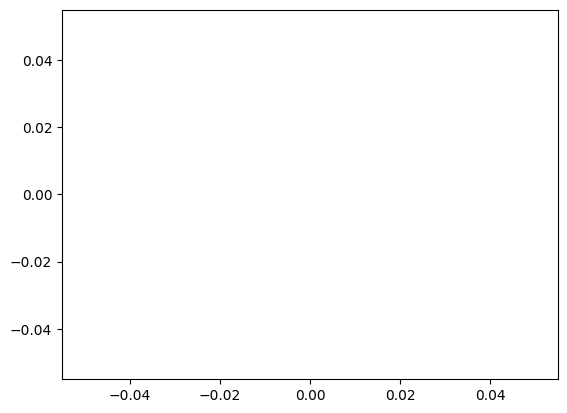

In [42]:
plt.plot(spread.index,spread)

-96.63085
73.42133615835046


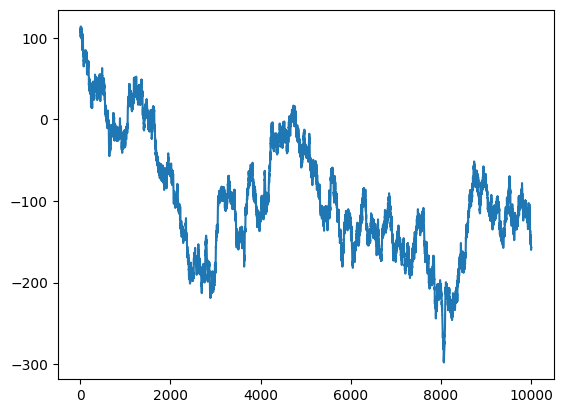

In [10]:
plt.plot(spread_1_3)
print(spread_1_3.mean())
print(spread_1_3.std())


In [35]:
b1.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')

10.792633333333333
114.01932291969442


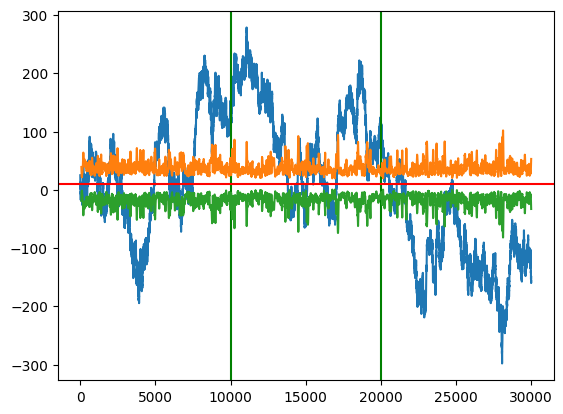

In [45]:

# spread_1 = (b1.ask_price_1.values + b1.bid_price_1.values)/2 - pb_1
spread_1 = b1.mid_price.values - pb_1
plt.plot(spread_1)
plt.axvline(x = 10000, color = 'g', label = 'axvline - full height')
plt.axvline(x = 20000, color = 'g', label = 'axvline - full height')
plt.axhline(y = 10.8,color="r")
plt.plot(pd.Series(spread_1).rolling(75).std()*2.75 + 10,)
plt.plot(10 - pd.Series(spread_1).rolling(75).std()*2.75 )
print(spread_1.mean())
print(spread_1.std())

56.90461666666667
57.09386067713167


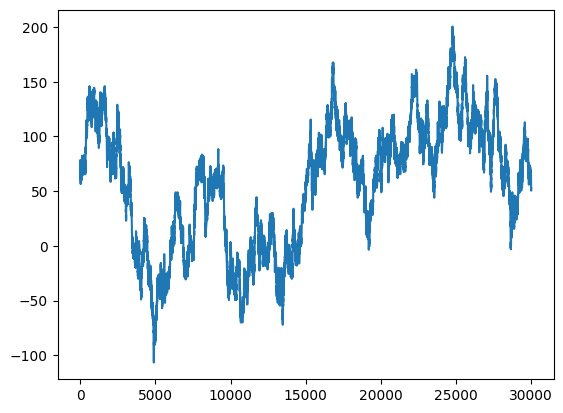

In [10]:
spread_2 = b2.mid_price.values - pb_2
plt.plot(spread_2)
print(spread_2.mean())
print(spread_2.std())

-96.63085
73.42133615835046


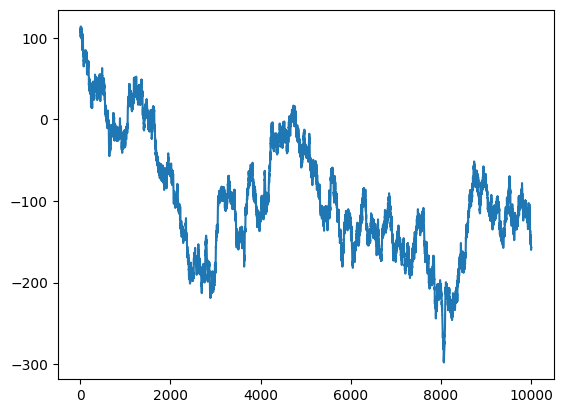

In [17]:
spread_1_3 = b1_3.mid_price.values - pb_1_3
plt.plot(spread_1_3)
print(spread_1_3.mean())
print(spread_1_3.std())

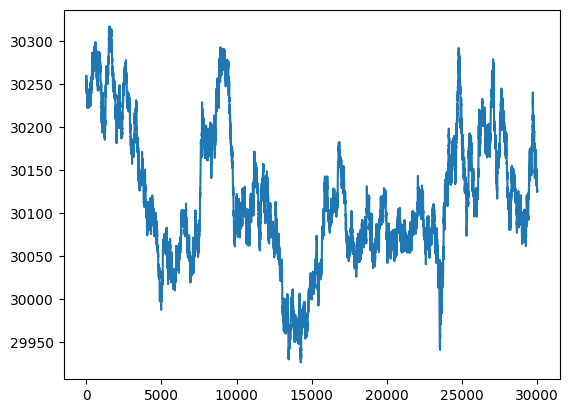

In [13]:
plt.plot(b2.mid_price.values)

In [12]:
y = croissant.mid_price.values
x = jams.mid_price.values

In [80]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 20.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 10.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
import sklearn

In [15]:
import sklearn.linear_model


model = sklearn.linear_model.LinearRegression()

In [13]:
x.reshape(-1,1)

array([[6632. ],
       [6631.5],
       [6632. ],
       ...,
       [6526. ],
       [6526. ],
       [6525. ]], shape=(30000, 1))

In [14]:
model.fit(x.reshape(-1,1),y)

NameError: name 'model' is not defined

In [90]:
model.coef_

array([0.3535586])

In [91]:
model.intercept_

np.float64(1966.7175519386656)

In [49]:
y = final[final["product"] == "CROISSANTS"].mid_price.values
x = final[final["product"] == "DJEMBES"].mid_price.values

In [50]:
x,y=y,x

In [51]:
X = pd.Series(x)
y = pd.Series(y)

In [52]:
X = X.copy().to_frame()
y = y.copy()

In [53]:
B = np.linalg.multi_dot([np.linalg.inv(np.dot(X.transpose(),X)), X.transpose(), y])

In [54]:
B

array([3.1324987])

In [130]:
djembes.mid_price.mean()

np.float64(13436.230966666666)

In [129]:
B

array([0.31987103])

In [ ]:
# y = b*x
# b = 0.65182388
# y is croissant price
# x is jams price

In [52]:
y = jams.mid_price.values
x = croissant.mid_price.values
X = pd.Series(x)
y = pd.Series(y)

In [55]:
X = X.copy().to_frame()
y = y.copy()

In [56]:
B = np.linalg.multi_dot([np.linalg.inv(np.dot(X.transpose(),X)), X.transpose(), y])

In [57]:
B

array([1.52798508])